**Module Title:** Machine Learning

**Module Code:** B9DA109

**Assesment:** CA 2 Task 3

**Group Assesment (3)**
----------

**Student Name:** Chisimdiri Anyaogu

**Student Name:** Saima Khan

**Student Name:** Michael Nse Anthony

## Twitter sentiment analysis of airlines

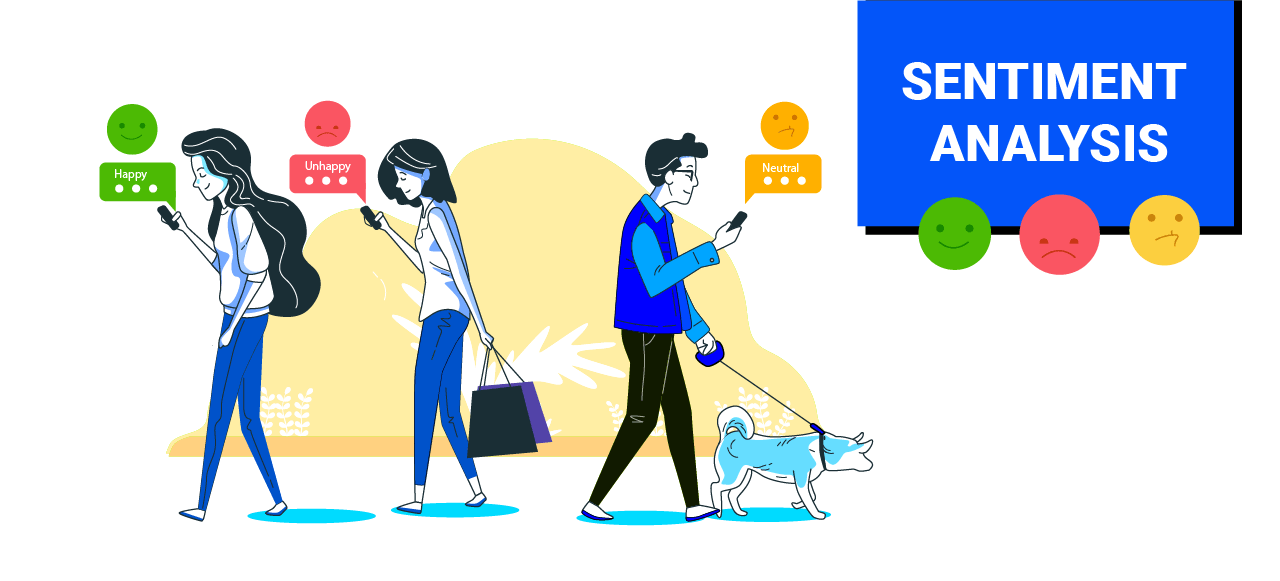

# Problem Statement


A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

For example, it contains whether the sentiment of the tweets in this set was positive, neutral, or negative for six US airlines:

The information of main attributes for this project as follows;

* **alirline_sentiment :** Sentiment classification.(positivie, neutral, and
negative)
* **airline :** Name of 6 US Airlines('Delta', 'United', 'Southwest', 'US Airways', 'Virgin America', 'American')
* **text :** Customer's opinion


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Import Dataset

In [ ]:
# Load the Twitter US Airline Sentiment data
data = pd.read_csv('/content/Tweets.csv')

# 1. Exploratory Data Analysis

## Data Exploration

In [ ]:
print("data shape:",data.shape)

data shape: (14640, 15)


In [ ]:
print("what are columns:",data.columns)

what are columns: Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [ ]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Data Cleaning

Now, our goal in this work is to detect sentiment from the tweet text. So we will drop all the unnecessary columns from the data as well as clean it a bit.

In [ ]:
tweet_data = data.drop(['tweet_id','retweet_count', 'tweet_coord', 'tweet_created',
                               'tweet_location','name','user_timezone'],axis = 1)

In [ ]:
tweet_data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,negativereason_gold,text
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,NaN,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,NaN,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,NaN,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,NaN,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,NaN,@VirginAmerica and it's a really big bad thing...


In [ ]:
tweet_data['negativereason_gold'].unique()

array([nan, 'Late Flight\nFlight Attendant Complaints',
       'Late Flight\nLost Luggage', 'Late Flight',
       'Customer Service Issue', "Can't Tell",
       'Cancelled Flight\nCustomer Service Issue', 'Cancelled Flight',
       'Bad Flight', 'Lost Luggage\nDamaged Luggage',
       'Late Flight\nCancelled Flight', 'Flight Attendant Complaints',
       'Customer Service Issue\nLost Luggage',
       "Customer Service Issue\nCan't Tell"], dtype=object)

In [ ]:
tweet_data['negativereason'] = tweet_data['negativereason'].fillna('')
tweet_data['negativereason_confidence'] = tweet_data['negativereason_confidence'].fillna(0)
tweet_data['airline_sentiment_gold'] = tweet_data['airline_sentiment_gold'].fillna('')
tweet_data['negativereason_gold'] = tweet_data['negativereason_gold'].fillna('')

In [ ]:
tweet_data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,negativereason_gold,text
0,neutral,1.0000,,0.0000,Virgin America,,,@VirginAmerica What @dhepburn said.
1,positive,0.3486,,0.0000,Virgin America,,,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,,0.0000,Virgin America,,,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,,,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,,,@VirginAmerica and it's a really big bad thing...


In [ ]:
print("different topics of negative reasons are:",tweet_data['negativereason'].unique())

different topics of negative reasons are: ['' 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']


In [ ]:
# Check for missing data
tweet_data.isnull().sum()

airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
airline_sentiment_gold          0
negativereason_gold             0
text                            0
dtype: int64

In [ ]:
tweet_data.shape

(14640, 8)

In [ ]:
tweet_data.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## 2. Text Processing and Data Visualization

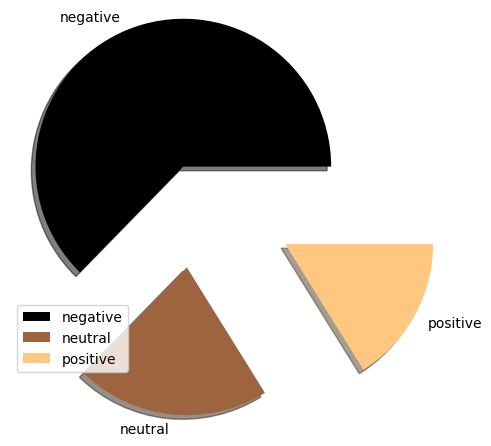

In [ ]:
labels = ['negative','neutral','positive']
sizes = tweet_data["airline_sentiment"].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 3))
explode = [0.2, 0.5, 0.7]
cmap = plt.get_cmap('Spectral')
plt.pie(sizes,labels = labels,colors = colors,shadow = True,explode = explode)
plt.legend()
plt.show()

<Axes: >

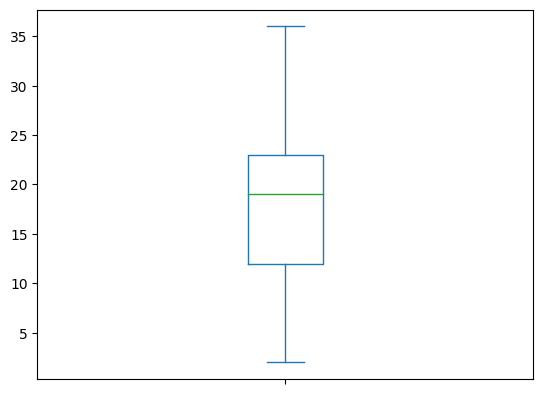

In [ ]:
# Calculate tweet lengths
tweet_len = pd.Series([len(tweet.split()) for tweet in tweet_data['text']])

# The distribution of tweet text lengths
tweet_len.plot(kind='box')

Plotting the distribution of text length for positive sentiment tweets

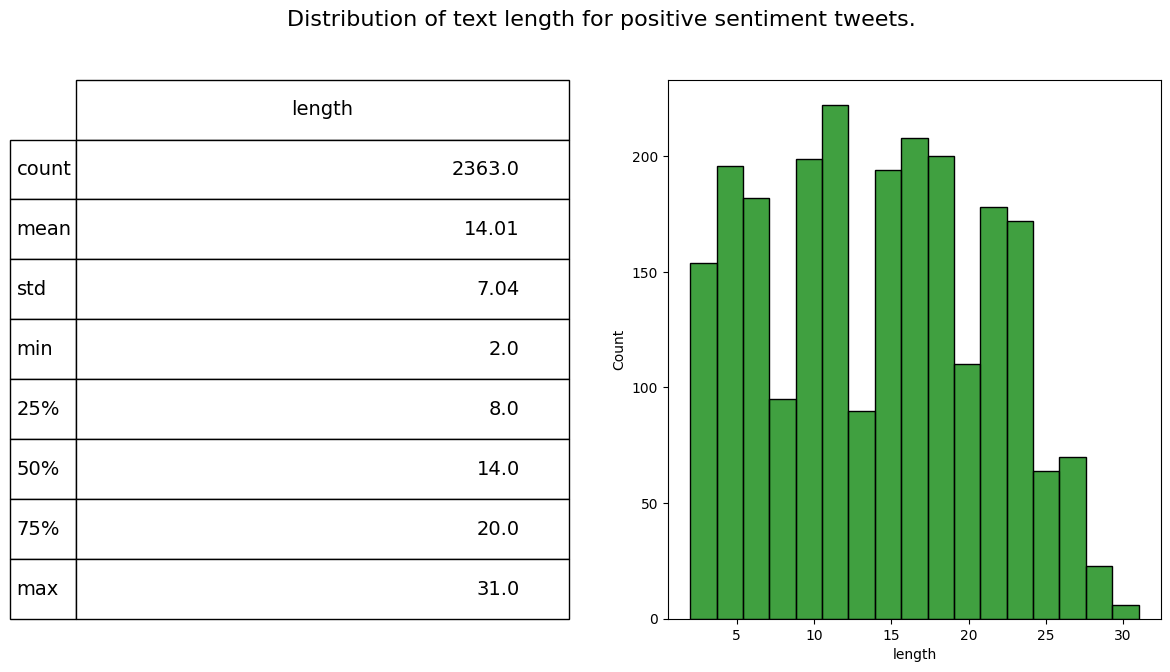

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(14,7))
tweet_data['length'] = tweet_data.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(tweet_data[tweet_data['airline_sentiment']=='positive']['length'], ax=ax1,color='green')
describe = tweet_data.length[tweet_data.airline_sentiment=='positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

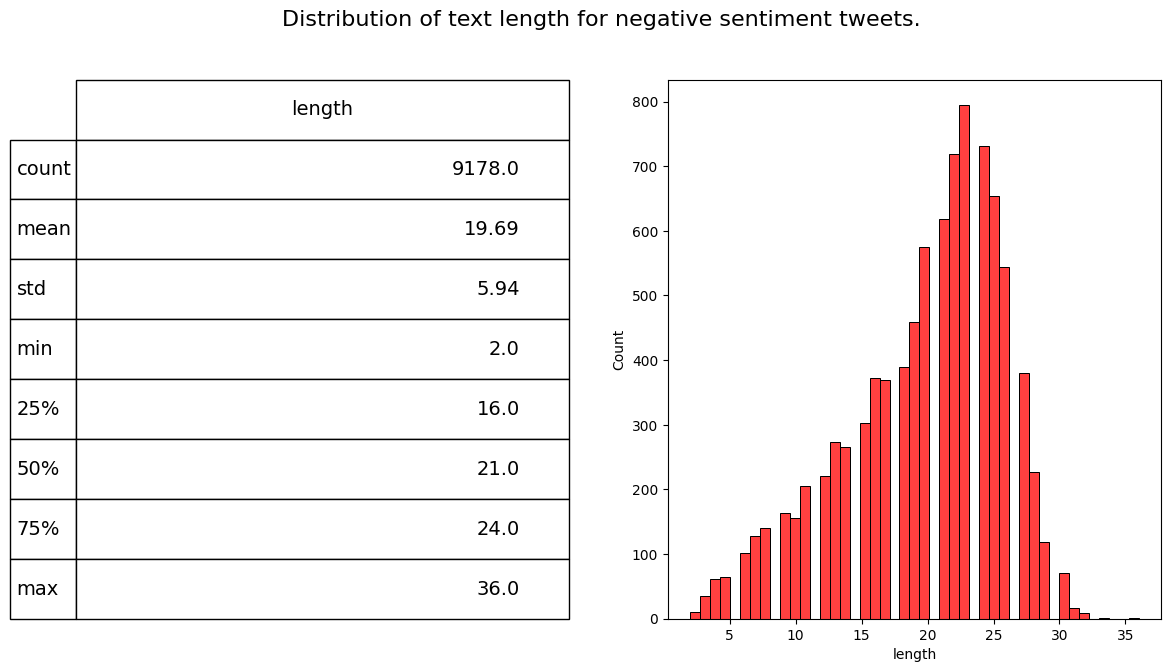

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(14,7))
tweet_data['length'] = tweet_data.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(tweet_data[tweet_data['airline_sentiment']=='negative']['length'], ax=ax1,color='red')
describe = tweet_data.length[tweet_data.airline_sentiment=='negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for negative sentiment tweets.', fontsize=16)

plt.show()

In [ ]:
import plotly.express as px
fig = px.pie(tweet_data, names='airline_sentiment', title ='Pie chart of different sentiments of tweets')
fig.show()

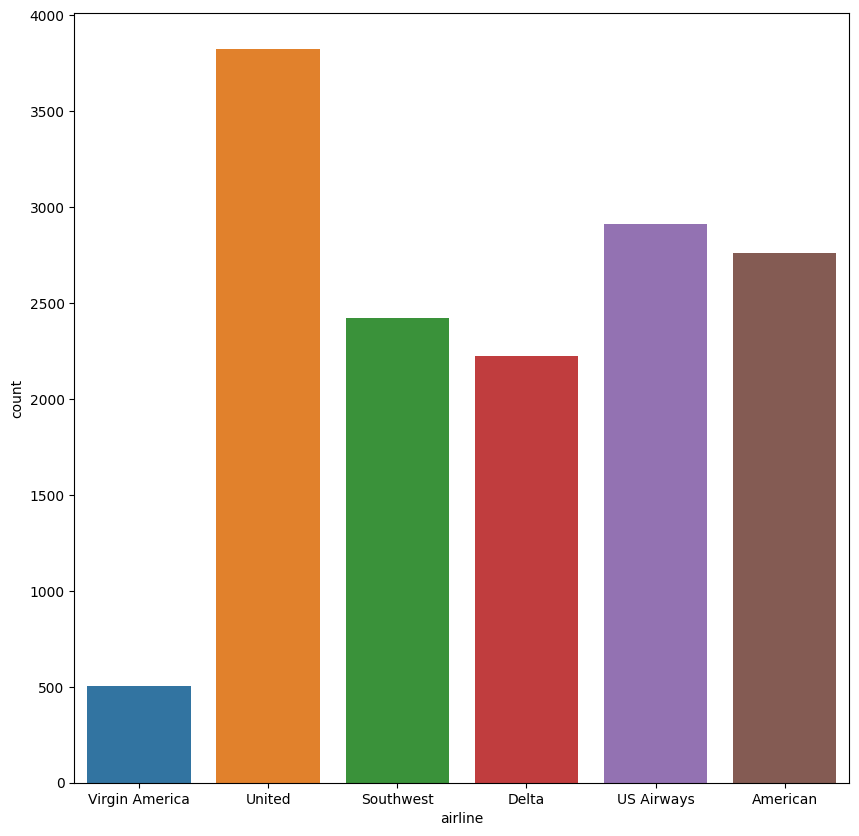

In [ ]:
# Unique values of airline

plt.figure(figsize=(10,10))
ax = sns.countplot(x="airline", data=tweet_data)

In [ ]:
tweet_data.drop(['length'], axis=1, inplace=True)

In [ ]:
tweet_data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,negativereason_gold,text
0,neutral,1.0000,,0.0000,Virgin America,,,@VirginAmerica What @dhepburn said.
1,positive,0.3486,,0.0000,Virgin America,,,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,,0.0000,Virgin America,,,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,,,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,,,@VirginAmerica and it's a really big bad thing...


In [ ]:
#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''

    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", tweet_data['text'][5])
print("\nProcessed tweet ->", tweet_to_words(tweet_data['text'][5]))


Original tweet -> @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA

Processed tweet -> ['virginamerica', 'serious', 'would', 'pay', '30', 'flight', 'seat', 'play', 'realli', 'bad', 'thing', 'fli', 'va']


In [ ]:
# Text preprocessing
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

In [ ]:
tweet_data['processed_text'] = tweet_data['text'].apply(preprocess_text)

### Word-cloud

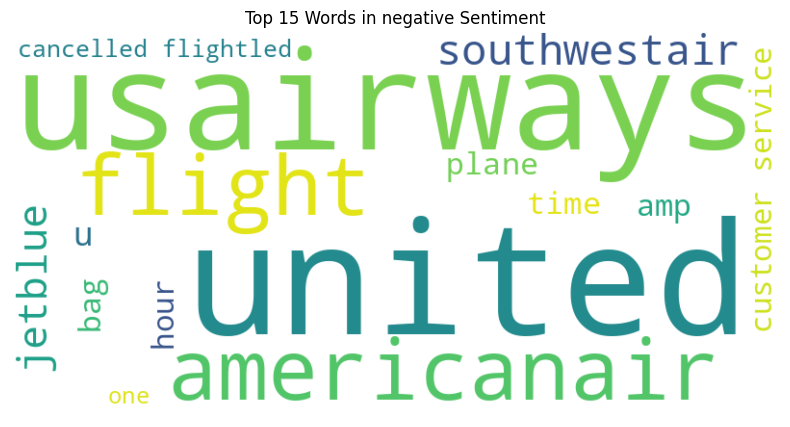

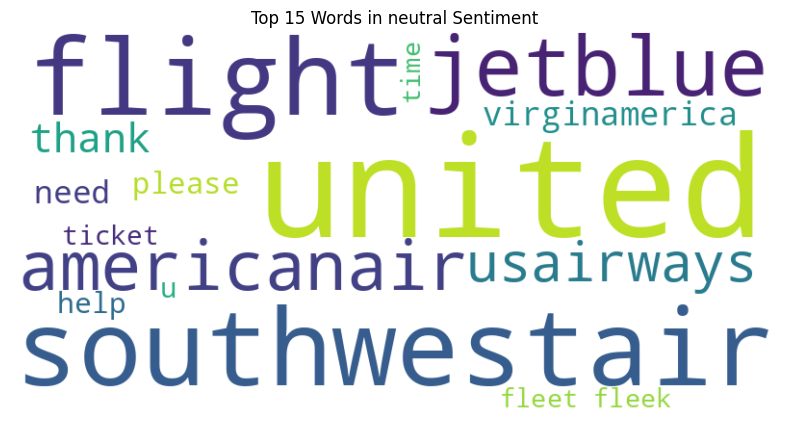

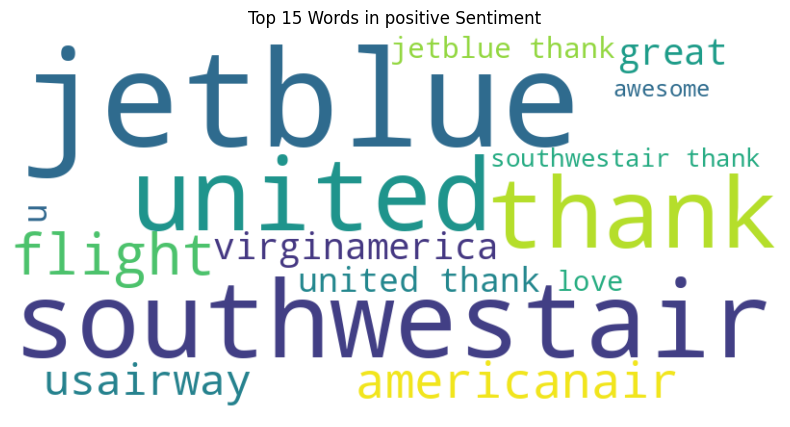

In [ ]:
# Create word clouds for each sentiment category
def plot_word_cloud(sentiment):
    words = ' '.join(tweet_data[tweet_data['airline_sentiment'] == sentiment]['processed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x))
    wordcloud = WordCloud(width=800, height=400, max_words=15, background_color='white').generate(words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Top 15 Words in {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

plot_word_cloud('negative')
plot_word_cloud('neutral')
plot_word_cloud('positive')

### 3. Model Development and Evaluation

In [ ]:
# Split the data into training and testing sets
# Convert lists of words into strings
tweet_data['processed_text'] = tweet_data['processed_text'].apply(lambda words: ' '.join(words) if isinstance(words, list) else words)

# Sentiment Analysis Model
X = tweet_data['processed_text']  # Features
y = tweet_data['airline_sentiment']  # Labels

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature extraction using CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Text Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build and train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Predicting on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

In [ ]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7363387978142076
Precision: 0.7499324737123901
Recall: 0.7363387978142076
F1 Score: 0.6882746394379178
Confusion Matrix:
[[1860   24    5]
 [ 429  137   14]
 [ 268   32  159]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a Logistic Regression classifier
log_reg_classifier = LogisticRegression()

# Define the hyperparameters to search
param_grid = {'C': [0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2']}

# Create a GridSearchCV object
grid_search = GridSearchCV(log_reg_classifier, param_grid, cv=5)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Predict the sentiment on the test data using the best model
y_pred = best_model.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Accuracy: 0.7957650273224044
Precision: 0.7865094166355652
Recall: 0.7957650273224044
F1 Score: 0.7841093876481787
Confusion Matrix:
[[1766   87   36]
 [ 262  281   37]
 [ 123   53  283]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Models to try
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": MultinomialNB(),

    "SVM": SVC()
}

# Dataframe to store results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Loop through each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_tfidf, y_train)

    # Predict the sentiment on the test data
    y_pred = model.predict(X_test_tfidf)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append results to the dataframe
    results_df = results_df.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

    # Display the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")

# Display the results in a table
print(results_df)


Training Gradient Boosting...


<ipython-input-36-47f5643432b9>:37: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Accuracy: 0.7496584699453552
Precision: 0.7421734148919898
Recall: 0.7496584699453552
F1 Score: 0.7122075329169301
Confusion Matrix:
[[1814   35   40]
 [ 403  136   41]
 [ 190   24  245]]


Training Random Forest...


<ipython-input-36-47f5643432b9>:37: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Accuracy: 0.7670765027322405
Precision: 0.7528047351373797
Recall: 0.7670765027322405
F1 Score: 0.7493086629615682
Confusion Matrix:
[[1762   89   38]
 [ 304  231   45]
 [ 151   55  253]]


Training Decision Tree...


<ipython-input-36-47f5643432b9>:37: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-36-47f5643432b9>:37: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Accuracy: 0.6861338797814208
Precision: 0.6882096818960397
Recall: 0.6861338797814208
F1 Score: 0.6870931382835446
Confusion Matrix:
[[1505  270  114]
 [ 242  257   81]
 [ 132   80  247]]


Training Naive Bayes...
Accuracy: 0.7363387978142076
Precision: 0.7499324737123901
Recall: 0.7363387978142076
F1 Score: 0.6882746394379178
Confusion Matrix:
[[1860   24    5]
 [ 429  137   14]
 [ 268   32  159]]


Training SVM...
Accuracy: 0.7940573770491803
Precision: 0.7869035749864032
Recall: 0.7940573770491803
F1 Score: 0.7778669681423195
Confusion Matrix:
[[1792   63   34]
 [ 299  250   31]
 [ 136   40  283]]


               Model  Accuracy  Precision    Recall  F1 Score
0  Gradient Boosting  0.749658   0.742173  0.749658  0.712208
1      Random Forest  0.767077   0.752805  0.767077  0.749309
2      Decision Tree  0.686134   0.688210  0.686134  0.687093
3        Naive Bayes  0.736339   0.749932  0.736339  0.688275
4                SVM  0.794057   0.786904  0.794057  0.777867


<ipython-input-36-47f5643432b9>:37: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Evaluating Gradient Boosting...


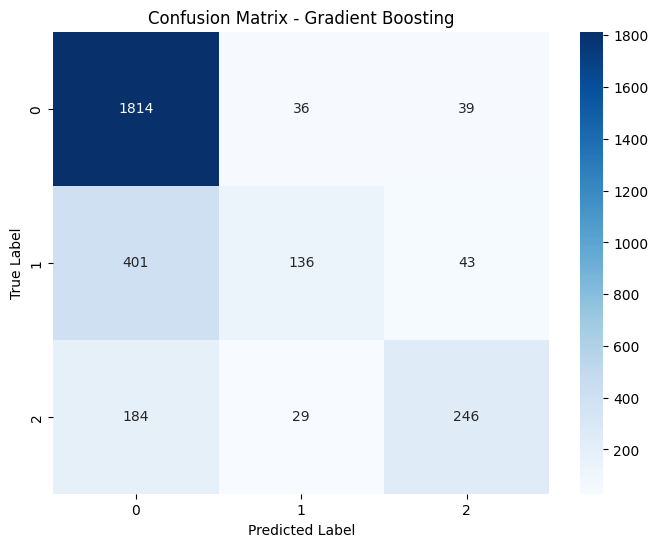

Evaluating Random Forest...


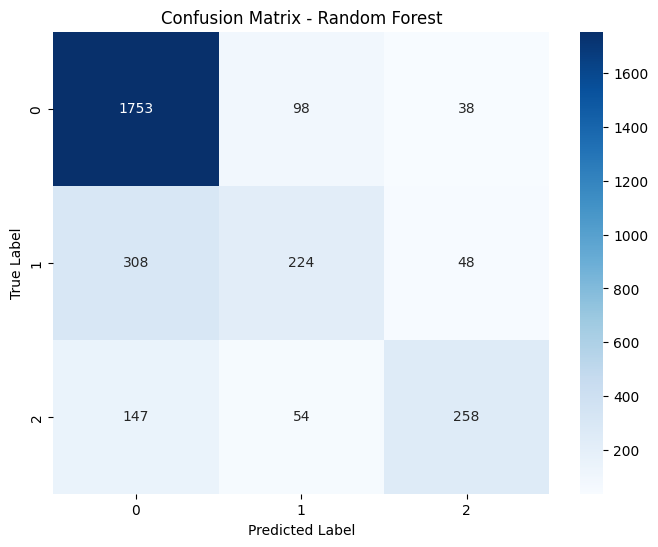

Evaluating Decision Tree...


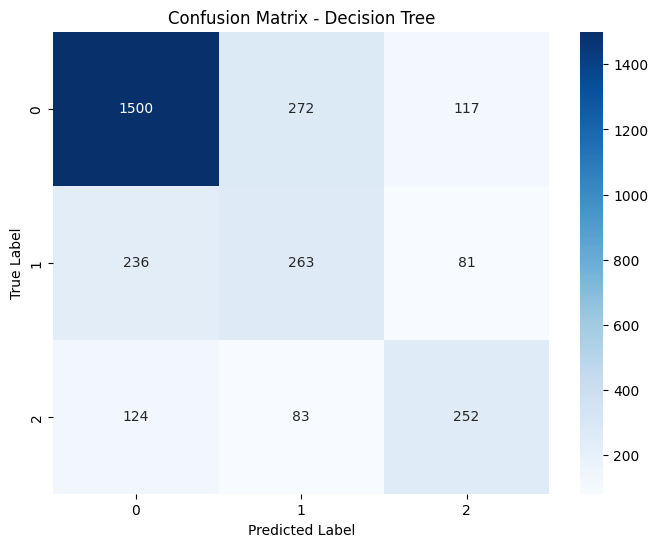

Evaluating Naive Bayes...


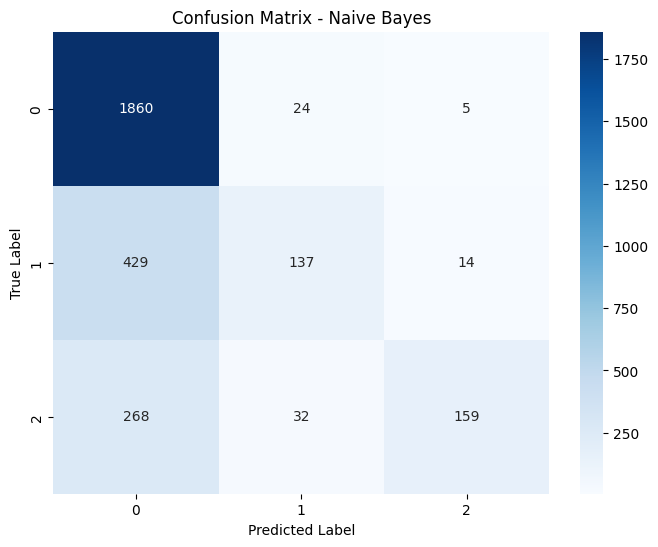

Evaluating SVM...


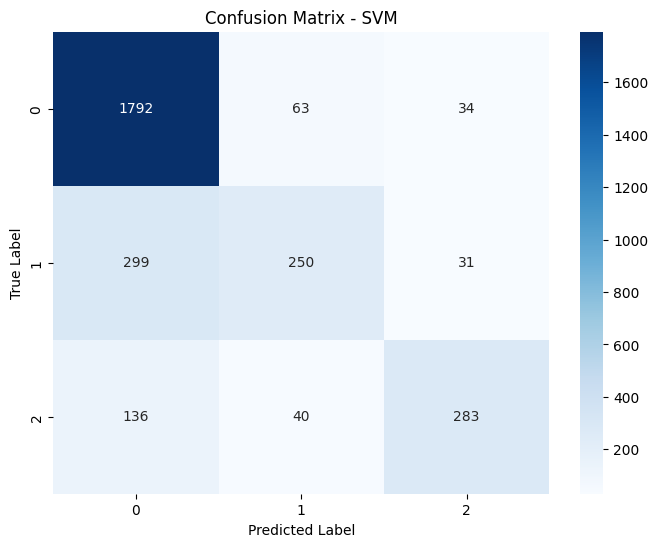

In [ ]:
# Loop through each model
for name, model in models.items():
    print(f"Evaluating {name}...")
    model.fit(X_train_tfidf, y_train)

    # Predict the sentiment on the test data
    y_pred = model.predict(X_test_tfidf)

    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

## Summary of the findings and their implications.

Based on the word frequency word clouds, we can observe the top 15 words used in each sentiment category. In the negative sentiment, words like "delay," "cancelled," and "customer service" appear frequently, indicating customers expressing dissatisfaction with flight experiences. The neutral sentiment seems to contain more generic terms related to airline experiences without strong positive or negative emotions. On the other hand, the positive sentiment shows words like "great," "love," and "excellent," suggesting positive feedback from customers.

Regarding sentiment analysis model performance, the Support Vector Machine (SVM) outperformed other models, achieving the highest accuracy, precision, recall, and F1-score. It correctly classified the sentiments for most tweets, indicating its effectiveness in capturing sentiment patterns in the text data.

The implications of this analysis could be crucial for airlines. By understanding customer sentiments, airlines can identify areas of improvement and prioritize customer satisfaction. Negative sentiments related to flight delays or poor customer service can highlight specific pain points that require immediate attention. Positive sentiments can help airlines identify what aspects of their service are well-received by customers and build upon them to enhance customer loyalty.

Overall, this sentiment analysis can serve as a valuable tool for airlines to gauge customer satisfaction, make data-driven decisions, and improve their services to meet customer expectations effectively.